SINGULAR VALUE DECOMPOSITION (SVD)

В теореме о сингулярном разложении утверждается, что у любой матрицы размера × существует разложение в произведение трех матриц:

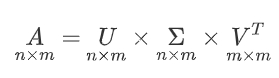

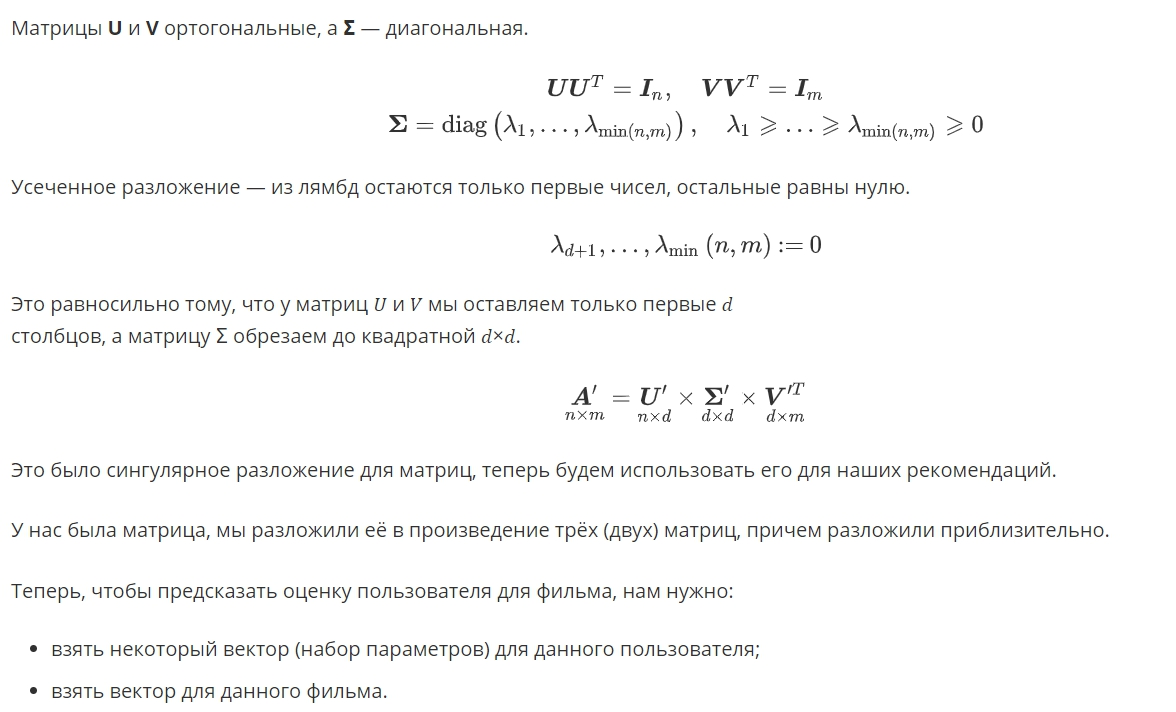

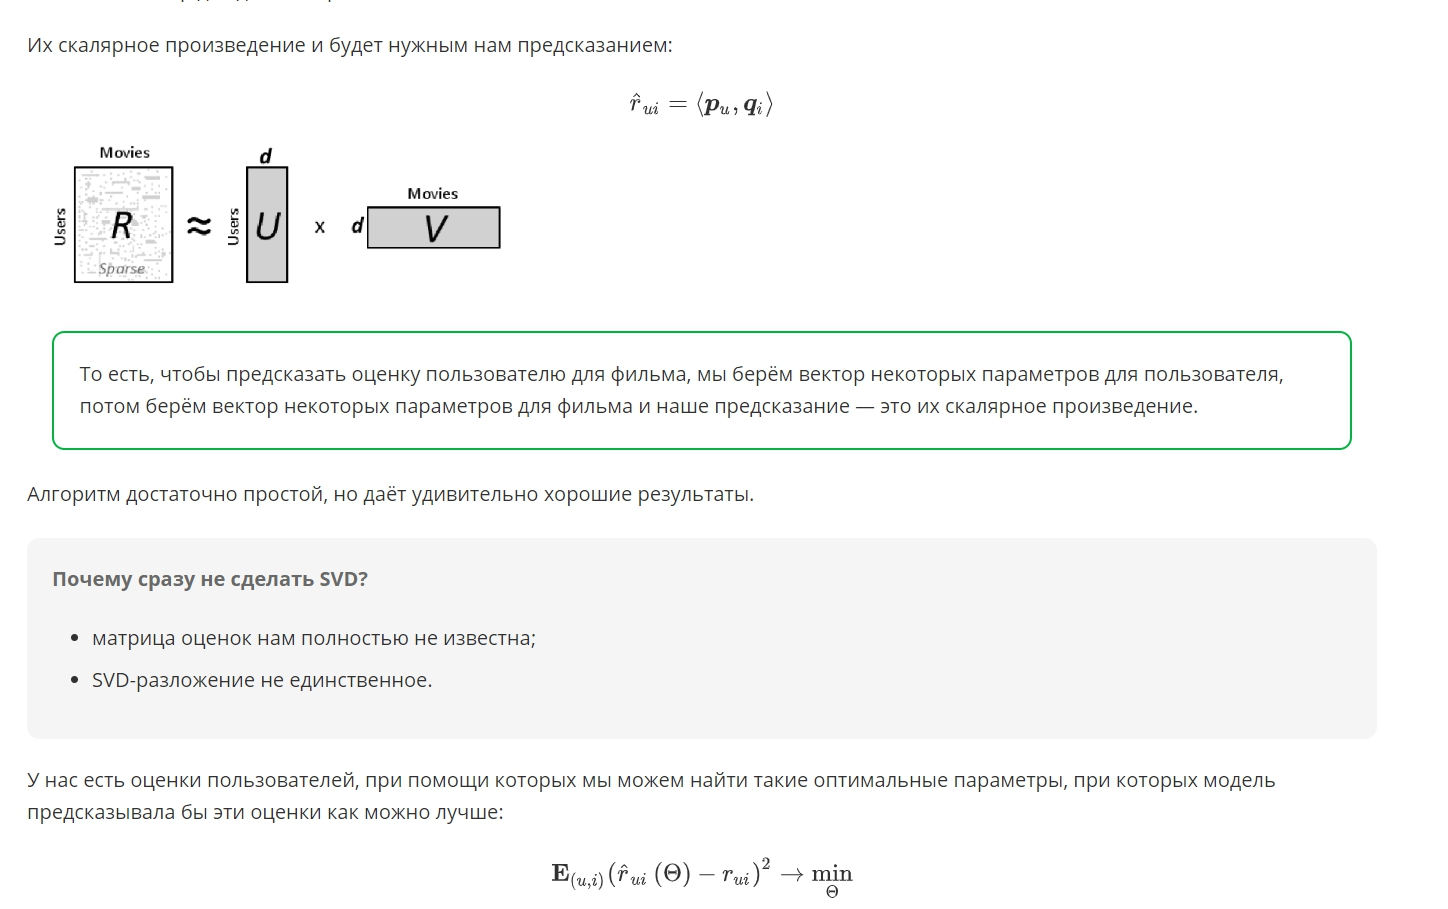

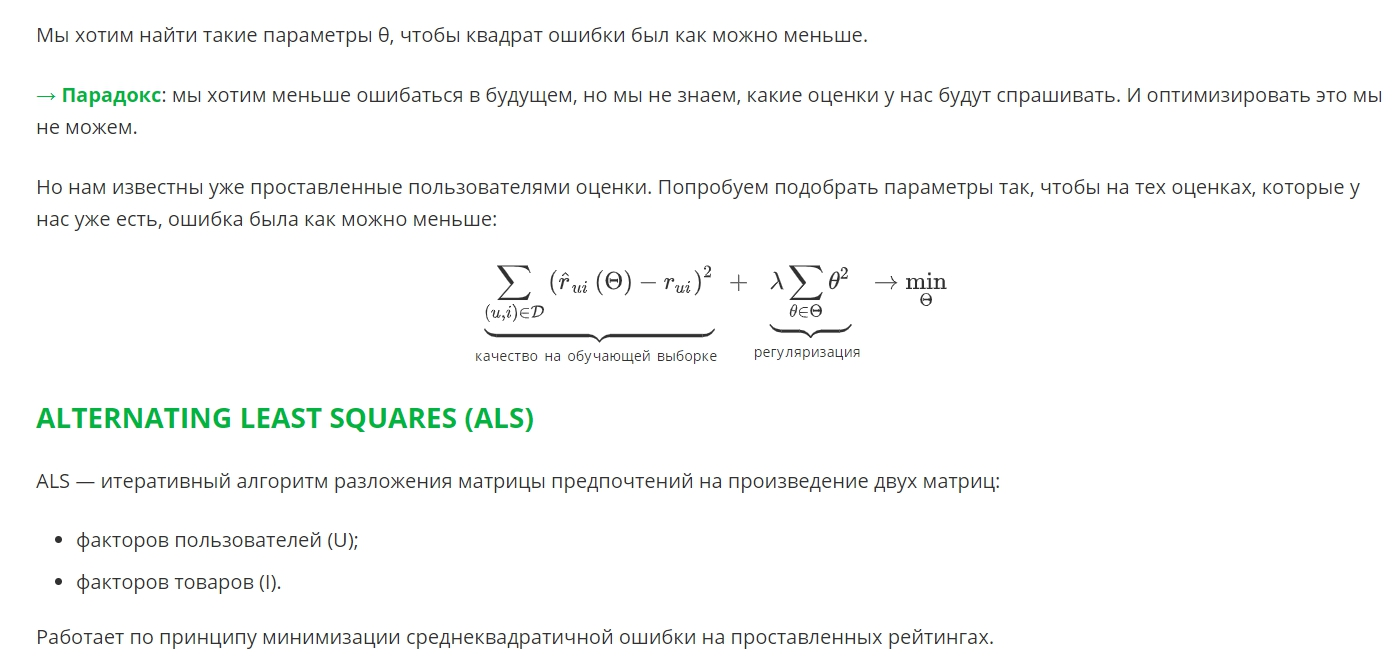

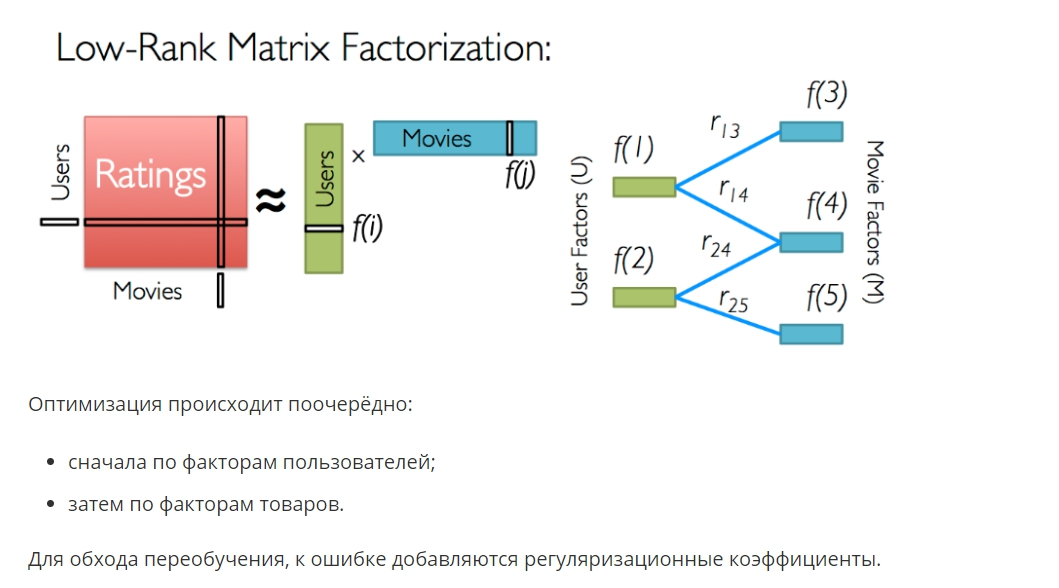

Оптимизация происходит поочерёдно:

- сначала по факторам пользователей;
- затем по факторам товаров.

Для обхода переобучения, к ошибке добавляются регуляризационные коэффициенты.

А ЕСЛИ ПРЕДПОЧТЕНИЯ МЕНЯЮТСЯ?

- Матрица предпочтений отражает предпочтения «в плоскости».
- Матрица предпочтений не отражает изменения предпочтений во времени.
- Матрица предпочтений не учитывает близость продуктов по  составу/цели/назначению.

ЗАДАНИЕ

В следующем задании вам необходимо будет написать свою имплементацию SVD-разложения. Но сначала разберём по шагам, как это сделать.

→ Шаг 1. Создадим матрицу 'пользователь-фильм', на которой будем практиковаться с SVD-разложением.

In [5]:
import numpy as np
user_movie_matrix = np.array(((1,5,0,5,4), (5,4,4,3,2), (0,4,0,0,5), (4,4,1,4,0), (0,4,3,5,0), (2,4,3,5,3)))

→ Шаг 2. Сингулярное разложение матрицы — это некое новое представление исходной матрицы, которое отображено в сингулярных числах и сингулярных векторах. Так выглядит формула сингулярного разложения:

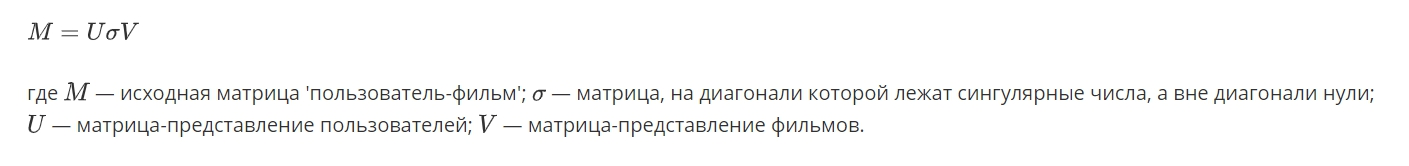

→ Шаг 3. Нам важно понимать, что в лице матрицы  мы получаем новое представление пользователей и фильмов соответственно. Мы не будем заставлять вас с нуля рассчитывать сингулярные числа и сингулярные векторы, воспользуемся встроенной функцией библиотеки scipy:

In [9]:
user_movie_matrix

array([[1, 5, 0, 5, 4],
       [5, 4, 4, 3, 2],
       [0, 4, 0, 0, 5],
       [4, 4, 1, 4, 0],
       [0, 4, 3, 5, 0],
       [2, 4, 3, 5, 3]])

In [11]:
from scipy.linalg import svd

U, s, V = svd(user_movie_matrix) 

При помощи библиотеки scipy проведите SVD-разложение матрицы user_movie_matrix. Введите в ответ вторую координату полученного вектора s (без округления).

In [7]:
s[1]

6.210013339488105

На этом этапе мы получили новое матричное представление пользователей и фильмов. Заметим, что размерность нашего разложения совпадает с размерностью исходной матрицы. 

На практике обычно используют сокращенное представление, так как SVD-алгоритм обладает свойством уменьшения размерности без значительной потери информации. На больших матрицах 1 000 000 x 1 000 000 это особенно ощутимо. 

Чтобы сократить размерность, например до двух компонент, необходимо взять по две первых строки из каждой матрицы-представления. 

→ Извлеките из матричных представлений первые две строки и сохраните их. Все дальнейшие действия будут производиться с ними.

SVD-разложение на две компоненты произведено. Теперь посмотрим, какой фильм наше новое представление порекомендует в первую очередь для существующего пользователя.

Из исходной матрицы выберем вторую строчку (пользователь №2) — user_2.

Важно! Имеется в виду именно индекс (то есть это третья строчка, если считать первую строку первой, а не нулевой).

Чтобы перевести пользователя в новое представление сниженной размерности, необходимо его исходный вектор умножить на транспонированную матрицу-представление фильмов.

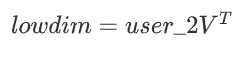

In [13]:
low_U = U[:2,:]
low_V = V[:2,:]

print(low_U)
print(low_V)

[[-0.45995612  0.39643205  0.30008466 -0.43188307  0.32259944 -0.5006374 ]
 [-0.46080622 -0.30693176 -0.6474524   0.28369822  0.01979887 -0.43974907]]
[[-0.31869431 -0.61196286 -0.29030808 -0.57523564 -0.32978869]
 [-0.40869555  0.22187036 -0.37571481 -0.25558153  0.75977493]]


In [15]:
lowdim  = user_movie_matrix[2] @ low_V.T

In [17]:
lowdim

array([-4.09679486,  4.68635611])

In [16]:
print(lowdim[1])

4.686356112218354


In [17]:
U[0:2]

array([[-0.45995612,  0.39643205,  0.30008466, -0.43188307,  0.32259944,
        -0.5006374 ],
       [-0.46080622, -0.30693176, -0.6474524 ,  0.28369822,  0.01979887,
        -0.43974907]])

In [19]:
s[0:2]

array([16.46644354,  6.21001334])

In [33]:
V

array([[-0.31869431, -0.61196286, -0.29030808, -0.57523564, -0.32978869],
       [-0.40869555,  0.22187036, -0.37571481, -0.25558153,  0.75977493],
       [-0.74298347,  0.03279947, -0.12815454,  0.59719556, -0.27172346],
       [-0.38699282, -0.12589696,  0.87032055, -0.2006657 ,  0.19147306],
       [ 0.17208719, -0.74789649, -0.02604148,  0.4548327 ,  0.45109412]])

# Рекомендательная система на основании SVD-разложения

Загружаем наши данные:

In [ ]:
import pandas as pd
df = pd.read_csv('data_fin.csv', sep=';')

Для того, чтобы алгоритм работал быстрее, мы будем использовать только часть пользователей и фильмов. Сократим наши данные. Оставим только 10000 пользователей и 5000 фильмов:

In [ ]:
cust_sample=df.Cust_Id.sample(10000)
movie_sample=df.Movie_Id.sample(5000)

Подгружаем библиотеку surprise, которую мы уже установили ранее:

In [53]:
import surprise
from surprise import Reader, Dataset

ModuleNotFoundError: No module named 'surprise'

И подгружаем в surprise выбранный нами датасет:

In [ ]:
reader=Reader(rating_scale=(0.5,5.0))
data=Dataset.load_from_df(df[['Cust_Id','Movie_Id','Rating']],reader)

Добавляем алгоритм SVD:

In [ ]:
from surprise import SVD

Задаём наш алгоритм и формируем обучающую выборку:

In [ ]:
svd=SVD()
trainingSet=data.build_full_trainset()

Тренируем наш алгоритм:

In [ ]:
svd.fit(trainingSet)

Далее мы уже можем получить предсказание:

In [ ]:
testSet=trainingSet.build_testset()
predictions=svd.test(testSet)

Подгружаем названия фильмов:

In [ ]:
titles = pd.read_csv('movie_titles.csv', encoding = "ISO-8859-1", 
                     header = None, 
                     names = ['Movie_Id', 'Year', 'Name'])

Далее можем задать функцию для определения топ-3 рекомендаций:

In [ ]:
from collections import defaultdict
 
def get_top3_recommendations(predictions, topN = 3):
     
    top_recs = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_recs[uid].append((iid, est))
     
    for uid, user_ratings in top_recs.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recs[uid] = user_ratings[:topN]
     
    return top_recs